# CS246 - Colab 1
## Wordcount in Spark

### Setup

Let's setup Spark on your Colab environment.  Run the cell below!

In [1]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     |████████████████████████████████| 212.4 MB 67 kB/s 
     |████████████████████████████████| 198 kB 47.2 MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=51082e2e3db0e9e0f454909ee58c78cc16659991710e79c886761b1df4f2d81f
  Stored in directory: /root/.cache/pip/wheels/a5/0a/c1/9561f6fecb759579a7d863dcd846daaa95f598744e71b02c77
Successfully built pyspark
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 2 newly installed, 0 to remove and 40 not upgraded.
Need to get 36.5 MB of archives.
After this operation, 143 MB of additional disk space will be used.
Selecting previously unselected package openjdk-8-jre-headless:amd64.
(Rea

Now we authenticate a Google Drive client to download the file we will be processing in our Spark job.

**Make sure to follow the interactive instructions.**

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
id='1SE6k_0YukzGd5wK-E4i6mG83nydlfvSa'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('pg100.txt')

If you executed the cells above, you should be able to see the file *pg100.txt* under the "Files" tab on the left panel.

### Your task

If you run successfully the setup stage, you are ready to work on the *pg100.txt* file which contains a copy of the complete works of Shakespeare.

Write a Spark application which outputs the number of words that start with each letter. This means that for every letter we want to count the total number of (non-unique) words that start with a specific letter. In your implementation **ignore the letter case**, i.e., consider all words as lower case. Also, you can ignore all the words **starting** with a non-alphabetic character.

In [4]:
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark import SparkContext
import pandas as pd

# create the Spark Session
spark = SparkSession.builder.getOrCreate()

# create the Spark Context
sc = spark.sparkContext

In [29]:
# YOUR
txt = sc.textFile('pg100.txt')
txt.take(10)

['The Project Gutenberg EBook of The Complete Works of William Shakespeare, by',
 'William Shakespeare',
 '',
 'This eBook is for the use of anyone anywhere at no cost and with',
 'almost no restrictions whatsoever.  You may copy it, give it away or',
 're-use it under the terms of the Project Gutenberg License included',
 'with this eBook or online at www.gutenberg.org',
 '',
 '** This is a COPYRIGHTED Project Gutenberg eBook, Details Below **',
 '**     Please follow the copyright guidelines in this file.     **']

In [30]:
# CODE
wordRdd = txt.map(lambda x: x.lower()).flatMap(lambda x: x.split(' '))
wordRdd.take(10)

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'the',
 'complete',
 'works',
 'of',
 'william']

In [9]:
# HERE
import pandas as pd
df = pd.DataFrame()
df['char'] = [chr(i) for i in range(ord('a'), ord('z') + 1)]
df.head()

,char
0,a
1,b
2,c
3,d
4,e


In [26]:
def counting(char):
  return wordRdd.filter(lambda x: x[0] in {char} if x else False).count()

In [27]:
df['count'] = df['char'].apply(counting)
df.head()

,char,count
0,a,84836
1,b,45455
2,c,34567
3,d,29713
4,e,18697


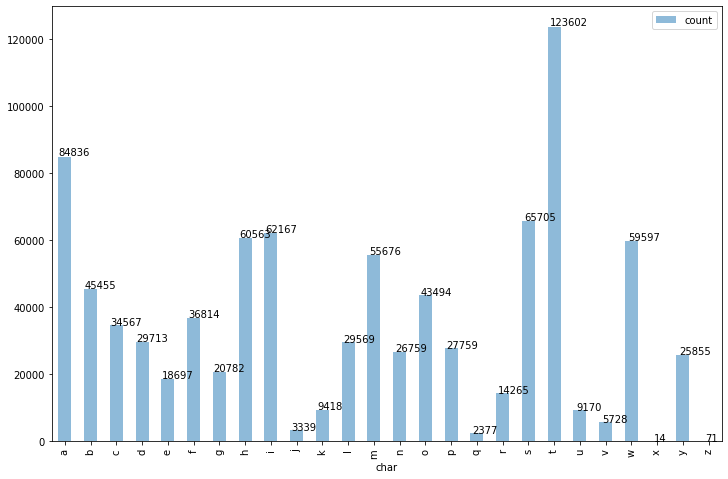

In [28]:
ax = df.plot(kind='bar', x='char', y='count', figsize=(12, 8), alpha=0.5,)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

Once you obtained the desired results, **head over to Gradescope and submit your solution for this Colab**!